### Btrop_NRJ_evol
Plot time series of btrop NRJ. 
test impact of filtering at the boundaries

In [1]:
%matplotlib notebook
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

from netCDF4 import Dataset, MFDataset
import sys, os
import numpy as np
import scipy.signal as sig

KRYPTON = "/data0/project/vortex/lahaye/"
RUCHBA = "/net/ruchba/local/tmp/2/lahaye/"
HOME = os.getenv('HOME')+"/"

In [24]:
simul = 'luckyt'
season = "_sum"
path_base = KRYPTON + 'DIAG/NRJ_fluxes/'
fil_sflux = path_base+simul+'_bt_fluxes.?.nc'#'_btrnrj.?.nc'
if simul in ['luckyt']:
    fil_tser = KRYPTON+"{0}_tseries_2Dvars/{0}_tseries_2Dvars{1}.nc".format(simul,season)
else:
    fil_tser = KRYPTON+"{0}_tseries_2Dvars/{0}_tseries_2Dvars{1}.nc".format(simul,season)

In [25]:
ncbt = MFDataset(fil_sflux, aggdim="eta_rho")
ke_lf = np.nanmean(ncbt.variables['ekbt_lf'][:], axis=(0,1))
pe_lf = np.nanmean(ncbt.variables['epbt_lf'][:], axis=(0,1))
ekraw = np.nanmean(ncbt.variables['ek_bt'][:], axis=(0,1))
epraw = np.nanmean(ncbt.variables['ep_bt'][:], axis=(0,1))
ncbt.close()

/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/lahaye/Coding/virtual_envs/py3-jhub/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [26]:
fcut = 1/12.2
fwdt = 1.2

nc = Dataset(fil_tser, "r")
times = nc.variables['scrum_time'][:]
dt = times[1]-times[0]
bb, aa = sig.butter(4, 2*dt*fcut*np.array([1/fwdt,fwdt]), "band")
ekbt = nc.variables['ubar'][:]
for jy in range(ekbt.shape[0]):
    indox, = np.where(np.isfinite(ekbt[jy,:,0]))
    ekbt[jy,:,:] = sig.filtfilt(bb, aa, sig.detrend(ekbt[jy,:,:][indox,:], axis=-1), \
                                method="gust", axis=-1)**2 + \
                sig.filtfilt(bb, aa, sig.detrend(nc.variables['vbar'][jy,:,:][indox,:], axis=-1), \
                                method="gust", axis=-1)**2
ekbt = np.nanmean(1025*ekbt/2., axis=(0,1))
epbt = nc.variables['zeta'][:]
for jy in range(epbt.shape[0]):
    indox, = np.where(np.isfinite(epbt[jy,:,0]))
    epbt[jy,:,:] = sig.filtfilt(bb, aa, sig.detrend(epbt[jy,:,:][indox,:], axis=-1), \
                                method="gust", axis=-1)**2
epbt = np.nanmean(epbt, axis=(0,1)) * 9.81
nc.close()

<IPython.core.display.Javascript object>


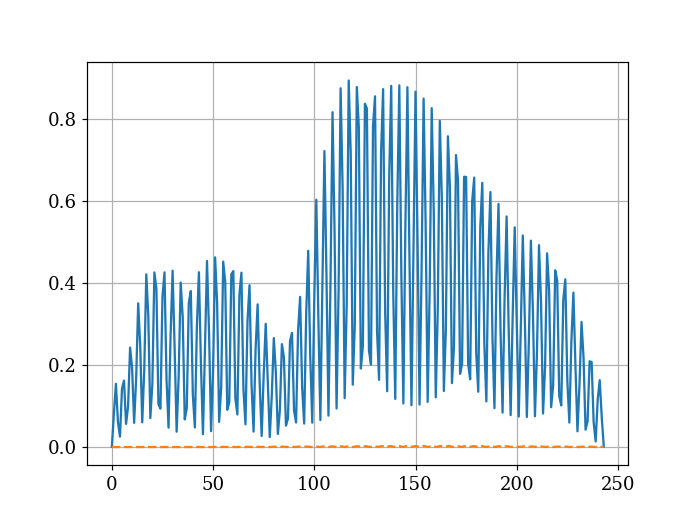

In [27]:
plt.plot(epraw)
plt.plot(epbt/1025, "--")
plt.grid(True)